In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("oscars.csv",index_col=0)

print(data[0:5])

          oscar_yr         award            name                       movie  \
oscar_no                                                                       
1             1929  Best actress    Janet Gaynor                  7th Heaven   
2             1930  Best actress   Mary Pickford                    Coquette   
3             1931  Best actress   Norma Shearer                The Divorcee   
4             1932  Best actress  Marie Dressler                Min and Bill   
5             1933  Best actress     Helen Hayes  The Sin of Madelon Claudet   

          age       birth_pl  birth_date  birth_mo  birth_d  birth_y  
oscar_no                                                              
1          22   Pennsylvania  1906-10-06        10        6     1906  
2          37         Canada  1892-04-08         4        8     1892  
3          28         Canada  1902-08-10         8       10     1902  
4          63         Canada  1868-11-09        11        9     1868  
5          32

In [2]:
best_actors=data[data["award"]=="Best actor"]
print(best_actors[0:5])

          oscar_yr       award              name  \
oscar_no                                           
1             1929  Best actor     Emil Jannings   
2             1930  Best actor     Warner Baxter   
3             1931  Best actor     George Arliss   
4             1932  Best actor  Lionel Barrymore   
5             1933  Best actor     Fredric March   

                                   movie  age      birth_pl  birth_date  \
oscar_no                                                                  
1         The Way of All Flesh & The Las   44   Switzerland  1884-07-23   
2                         In Old Arizona   40          Ohio  1889-03-29   
3                               Disraeli   62       England  1868-04-10   
4                            A Free Soul   53  Pennsylvania  1878-04-28   
5                Dr. Jekyll and Mr. Hyde   35     Wisconsin  1897-08-31   

          birth_mo  birth_d  birth_y  
oscar_no                              
1                7       23    

In [3]:
best_actress=data[data["award"]=="Best actress"]
print(best_actress[0:5])

          oscar_yr         award            name                       movie  \
oscar_no                                                                       
1             1929  Best actress    Janet Gaynor                  7th Heaven   
2             1930  Best actress   Mary Pickford                    Coquette   
3             1931  Best actress   Norma Shearer                The Divorcee   
4             1932  Best actress  Marie Dressler                Min and Bill   
5             1933  Best actress     Helen Hayes  The Sin of Madelon Claudet   

          age       birth_pl  birth_date  birth_mo  birth_d  birth_y  
oscar_no                                                              
1          22   Pennsylvania  1906-10-06        10        6     1906  
2          37         Canada  1892-04-08         4        8     1892  
3          28         Canada  1902-08-10         8       10     1902  
4          63         Canada  1868-11-09        11        9     1868  
5          32

In [4]:
final={}
final['men_avg']=round(np.mean(best_actors['age']))
final['women_avg']=round(np.mean(best_actress['age']))
final['men_median']=round(np.median(best_actors['age']))
final['women_median']=round(np.median(best_actress['age']))
index_label="Age of winner"
f=pd.DataFrame(final,index=[index_label])
print(f)

               men_avg  women_avg  men_median  women_median
Age of winner       44         36          42            33


[29. 34. 39. 45. 50. 55. 60. 66. 71. 76.]


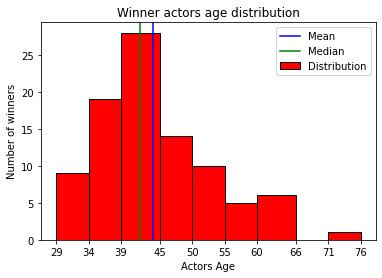

In [5]:
bin_len_m=np.round(np.linspace(min(best_actors["age"]), max(best_actors["age"]), 10))
print(bin_len_m)
plt.hist(best_actors["age"],bins=bin_len_m,edgecolor='black',color='red')
plt.xticks(bin_len_m)
plt.xlabel("Actors Age")
plt.ylabel("Number of winners")
plt.title("Winner actors age distribution")
plt.axvline(f.iloc[0,0],c='blue')
plt.axvline(f.iloc[0,2],c='green')
plt.legend(['Mean','Median','Distribution'])

[21. 28. 34. 41. 47. 54. 60. 67. 73. 80.]


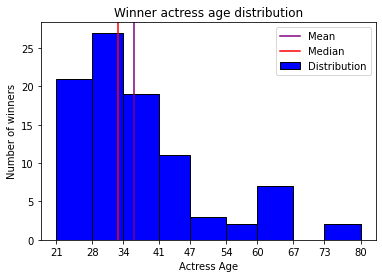

In [6]:
bin_len_w=np.round(np.linspace(min(best_actress["age"]), max(best_actress["age"]), 10))
print(bin_len_w)
plt.hist(best_actress["age"],bins=bin_len_w,edgecolor='black',color='blue')
plt.xticks(bin_len_w)
plt.xlabel("Actress Age")
plt.ylabel("Number of winners")
plt.title("Winner actress age distribution")
plt.axvline(f.iloc[0,1],c='purple')
plt.axvline(f.iloc[0,3],c='red')
plt.legend(['Mean','Median','Distribution'])

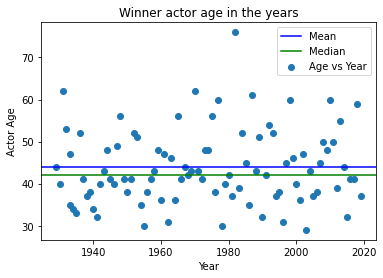

In [7]:
plt.scatter(best_actors['oscar_yr'],best_actors['age'])
plt.xlabel("Year")
plt.ylabel("Actor Age")
plt.title("Winner actor age in the years")
plt.axhline(f.iloc[0,0],c='blue')
plt.axhline(f.iloc[0,2],c='green')
plt.legend(['Mean','Median','Age vs Year'])

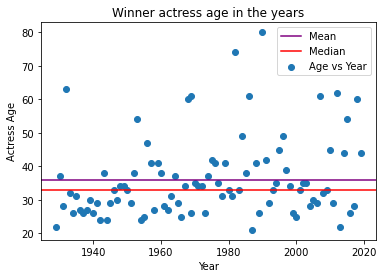

In [8]:
plt.scatter(best_actress['oscar_yr'],best_actress['age'])
plt.xlabel("Year")
plt.ylabel("Actress Age")
plt.title("Winner actress age in the years")
plt.axhline(f.iloc[0,1],c='purple')
plt.axhline(f.iloc[0,3],c='red')
plt.legend(['Mean','Median','Age vs Year'])

In [9]:
exception=best_actress[best_actress['age']>40]
exception=exception[exception['oscar_yr']<1950]
for lab,row in exception.iterrows():
    print(row)

oscar_yr                1932
award           Best actress
name          Marie Dressler
movie           Min and Bill
age                       63
birth_pl              Canada
birth_date        1868-11-09
birth_mo                  11
birth_d                    9
birth_y                 1868
Name: 4, dtype: object


In [10]:
men_count=best_actors['name'].unique()
men_dict={}
for men in men_count:
    if best_actors[best_actors.name==men].shape[0]>1:
        men_dict[men]=best_actors[best_actors.name==men].shape[0]
    else:
        pass
men_top=pd.DataFrame(men_dict,index=['Oscars'])

for lab,row in men_top.iterrows():
    print(row)
    
men_top_len=len(men_top.keys())
print(f'Total amount of men with more than 1 Oscar: {men_top_len}')

Fredric March       2
Spencer Tracy       2
Gary Cooper         2
Marlon Brando       2
Jack Nicholson      2
Dustin Hoffman      2
Daniel Day-Lewis    3
Tom Hanks           2
Sean Penn           2
Name: Oscars, dtype: int64
Total amount of men with more than 1 Oscar: 9


In [11]:
women_count=best_actress['name'].unique()
women_dict={}
for women in women_count:
    if best_actress[best_actress.name==women].shape[0]>1:
        women_dict[women]=best_actress[best_actress.name==women].shape[0]
    else:
        pass
women_top=pd.DataFrame(women_dict,index=['Oscars'])

for lab,row in women_top.iterrows():
    print(row)
    
women_top_len=len(women_top.keys())
print(f'Total amount of women with more than 1 Oscar: {women_top_len}')

Katharine Hepburn      4
Bette Davis            2
Luise Rainer           2
Vivien Leigh           2
Ingrid Bergman         2
Olivia de Havilland    2
Glenda Jackson         2
Jane Fonda             2
Sally Field            2
Meryl Streep           2
Jodie Foster           2
Frances McDormand      2
Hilary Swank           2
Name: Oscars, dtype: int64
Total amount of women with more than 1 Oscar: 13


In [12]:
#Conclusions

# Analysis of the data shows that Winners among the men get their Oscars with mean age of 44 yo with median of 42 yo
# while Winners among the women get their Oscars with mean age of 36 yo with median of 33 yo

# The changes in the trend are not visible looking on men charts while there is a little change of tendency among women.

# As we can see to the 50s' there wasn't a winner older than 40 yo except of Marrie Dressler who took Oscar during the 4th
# ceremony in year 1932 being 63 yo

# 9 actors and 13 actresses have more than 1 oscar
# Only 1 actor and 1 actress have more than 2 Oscars and here they are : Katharine Hepburn (4) and Daniel Day - Lewis (3)